In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sales_csv_path = ('/Users/lourefra/Documents/Mercedes-benz.io/TRAINING/post graduation course IST - Data science/fich_csv_tests/sales_info.csv')


df = pd.read_csv(sales_csv_path)

print(df)

   Company   Person  Sales
0     GOOG      Sam    200
1     GOOG  Charlie    120
2     GOOG    Frank    340
3     MSFT     Tina    600
4     MSFT      Amy    124
5     MSFT  Vanessa    243
6       FB     Carl    870
7       FB    Sarah    350
8     APPL     John    250
9     APPL    Linda    130
10    APPL     Mike    750
11    APPL    Chris    350


Group data

In [25]:
df.groupby(['Company']).sum('Sales').reset_index()

,Company,Sales
0,APPL,1480
1,FB,1220
2,GOOG,660
3,MSFT,967


In [22]:
df.groupby(['Company','Person']).sum('Sales').reset_index()


,Company,Person,Sales
0,APPL,Chris,350
1,APPL,John,250
2,APPL,Linda,130
3,APPL,Mike,750
4,FB,Carl,870
5,FB,Sarah,350
6,GOOG,Charlie,120
7,GOOG,Frank,340
8,GOOG,Sam,200
9,MSFT,Amy,124


In [4]:
df_2 = df.groupby('Company').agg({'Sales':'sum'}).reset_index()
print(df_2)

  Company  Sales
0    APPL   1480
1      FB   1220
2    GOOG    660
3    MSFT    967


In [5]:
df_2_1 = df.groupby('Company').agg(\
total_sales=('Sales','sum'),\
num_persons=('Person','count')
)\
.reset_index()\

print(df_2_1)

  Company  total_sales  num_persons
0    APPL         1480            4
1      FB         1220            2
2    GOOG          660            3
3    MSFT          967            3


Creating visuals


/var/folders/c4/7p0dsfgx11b12ysjrzs_hf940000gn/T/ipykernel_3336/1612603297.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


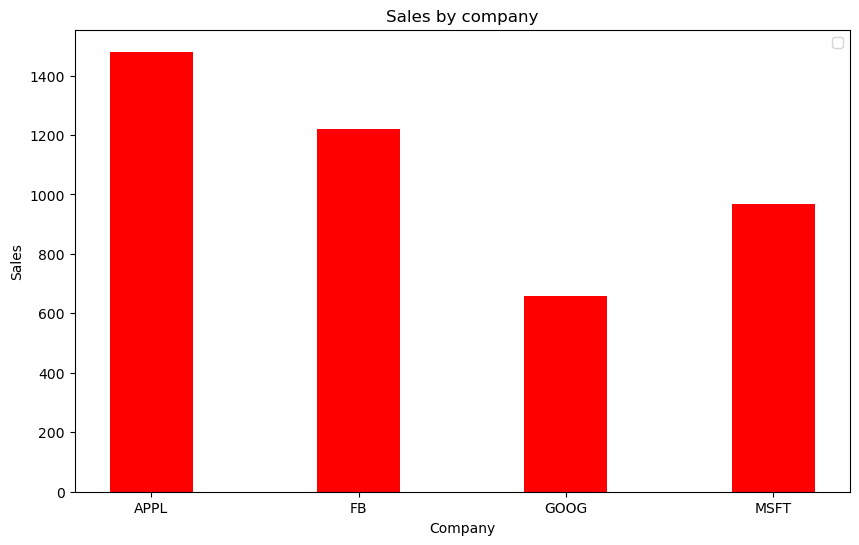

In [55]:

# Configura o tamanho da figura
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras para 'total_sales'
plt.bar(df_2_1['Company'],df_2_1['total_sales'],color = 'Red',width=0.4)


# Adiciona rótulos e título
plt.xlabel('Company')
plt.ylabel('Sales')
plt.title('Sales by company')

# Mostra a legenda
plt.legend()

# Mostra o gráfico
plt.show()

/var/folders/c4/7p0dsfgx11b12ysjrzs_hf940000gn/T/ipykernel_3336/3090766053.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


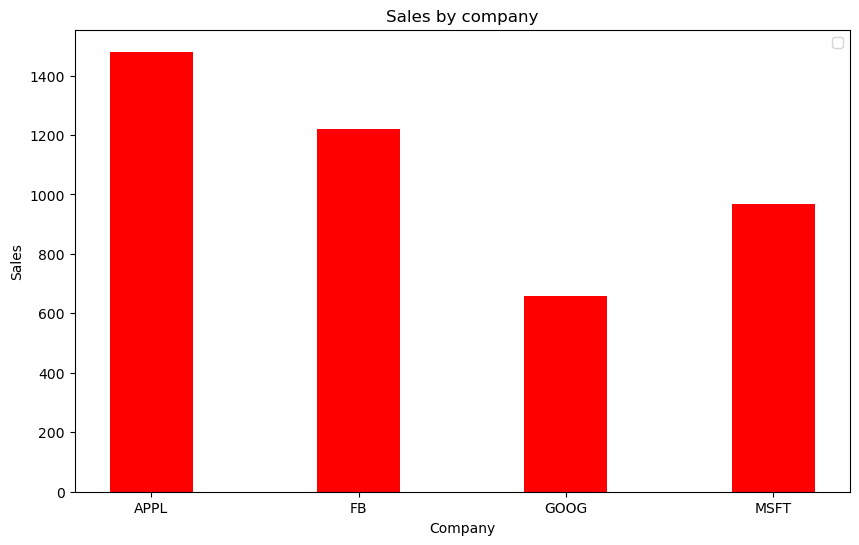

In [57]:

# Configura o tamanho da figura
plt.figure(figsize=(10, 6))

#dados
company = df_2_1['Company']
total_sales= df_2_1['total_sales']
num_persons= df_2_1['num_persons']

# Cria o gráfico de barras para 'total_sales'
plt.bar(company,total_sales,color = 'Red',width=0.4)


# Adiciona rótulos e título
plt.xlabel('Company')
plt.ylabel('Sales')
plt.title('Sales by company')

# Mostra a legenda
plt.legend()

# Mostra o gráfico
plt.show()

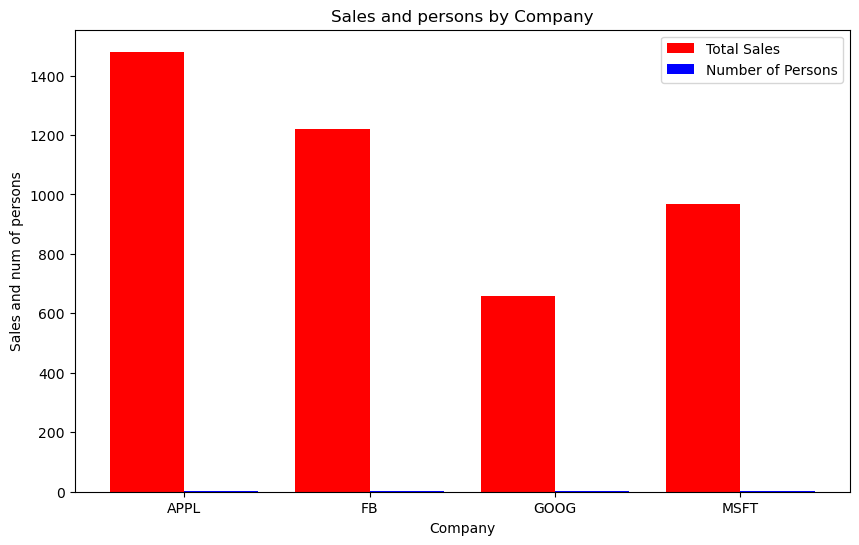

In [58]:
# Configura o tamanho da figura
plt.figure(figsize=(10, 6))

#dados
company = df_2_1['Company']
total_sales= df_2_1['total_sales']
num_persons= df_2_1['num_persons']

# Cria o gráfico de barras para 'total_sales'
plt.bar(company,total_sales,color = 'Red',width=0.4)


# Definindo a largura das barras
bar_width = 0.4
index = np.arange(len(company))  # Posições no eixo X


# Cria as barras para total_sales e num_persons
plt.bar(index, total_sales, bar_width, color='red', label='Total Sales')
plt.bar(index + bar_width, num_persons, bar_width, color='blue', label='Number of Persons')



# Adiciona rótulos e título
plt.xlabel('Company')
plt.ylabel('Sales and num of persons')
plt.title('Sales and persons by Company')
plt.xticks(index + bar_width / 2, company)  # Define as labels do eixo X para ficarem no centro das barras


# Mostra a legenda
plt.legend()

# Mostra o gráfico
plt.show()

/var/folders/c4/7p0dsfgx11b12ysjrzs_hf940000gn/T/ipykernel_12579/2486494234.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


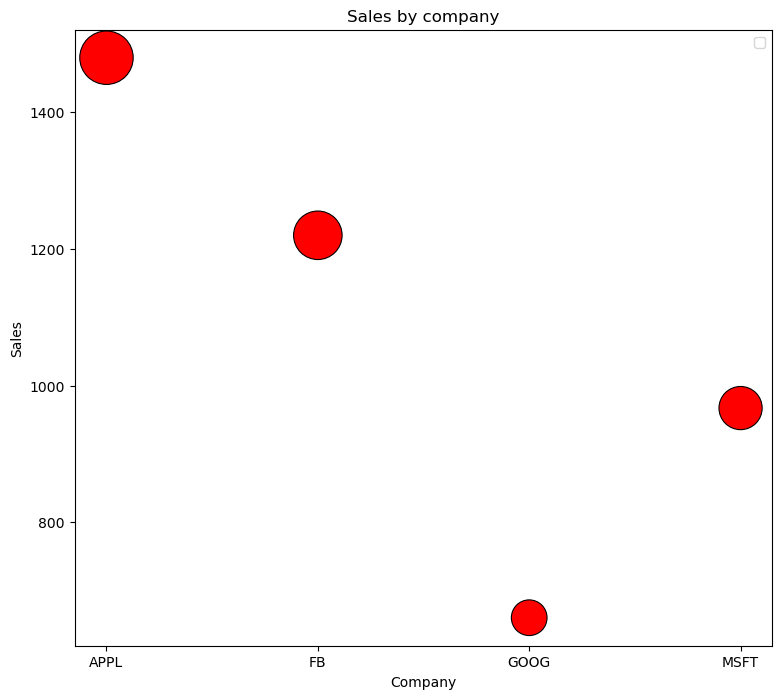

In [31]:

# Configura o tamanho da figura
plt.figure(figsize=(9, 8))

#dados
company = df_2_1['Company']
total_sales= df_2_1['total_sales']
num_persons= df_2_1['num_persons']

# Cria o gráfico de barras para 'total_sales'
plt.scatter(company, total_sales, color='Red', s=total_sales, alpha=1, edgecolors="black", linewidth=0.8)



# Adiciona rótulos e título
plt.xlabel('Company')
plt.ylabel('Sales')
plt.title('Sales by company')

# Mostra a legenda
plt.legend()

# Mostra o gráfico
plt.show()

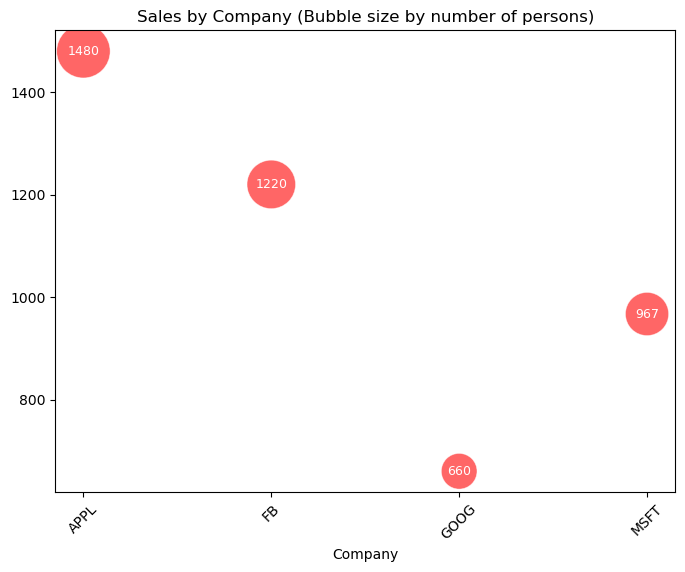

In [35]:
plt.figure(figsize=(8, 6))

# Dados
company = df_2_1['Company']
total_sales = df_2_1['total_sales']
num_persons = df_2_1['num_persons']

# Converte 'Company' para números para o eixo X
x = range(len(company))

# Cria o gráfico de dispersão (bubble plot) para 'total_sales', com o tamanho das bolhas definido por 'num_persons'
plt.scatter(x, total_sales, s=total_sales, color='Red', alpha=0.6, edgecolors="w", linewidth=0.5)

# Adiciona rótulos e título
plt.xlabel('Company')
plt.title('Sales by Company (Bubble size by number of persons)')

# Coloca o nome da empresa e o valor nas bolhas
for i, txt in enumerate(total_sales):
    plt.annotate(txt, (x[i], total_sales[i]), fontsize=9, ha='center', va='center', color="white")

# Define os rótulos do eixo X com os nomes das empresas
plt.xticks(x, company, rotation=45)

# Mostra o gráfico
plt.show()